In [5]:
import numpy as np
import pandas as pd

In [10]:
df=pd.read_csv('/placement.csv')

In [11]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [12]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [13]:
df.shape

(100, 4)

In [14]:
df=df.iloc[:,1:]

In [15]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [16]:
import matplotlib.pyplot as plt


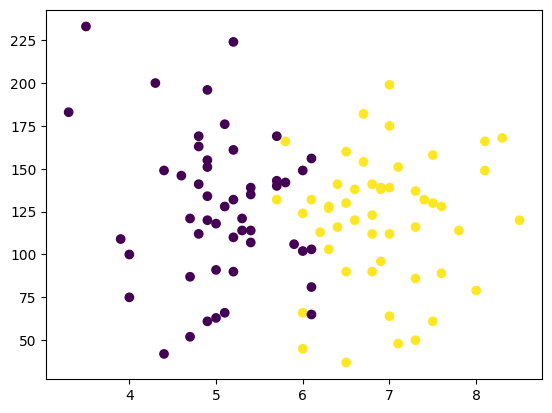

In [17]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [18]:
X=df.iloc[:,0:2]
y=df.iloc[:,-1]

In [19]:
X


,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [20]:
y

,placement
0,1
1,0
2,0
3,1
4,0
...,...
95,0
96,0
97,1
98,1


In [21]:
y.shape

(100,)

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1)


In [23]:
X_train

,cgpa,iq
76,4.9,155.0
96,4.4,42.0
90,7.3,86.0
87,5.7,132.0
29,7.0,112.0
...,...,...
40,4.9,134.0
32,7.0,139.0
51,4.8,141.0
4,5.8,142.0


In [24]:
y_train

,placement
76,0
96,0
90,1
87,1
29,1
...,...
40,0
32,1
51,0
4,0


In [25]:
X_test

,cgpa,iq
44,7.5,61.0
62,6.0,102.0
95,4.3,200.0
74,6.7,154.0
16,5.2,224.0
59,4.8,112.0
91,7.5,158.0
99,6.2,113.0
54,6.4,141.0
77,7.3,50.0


In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
scalar=StandardScaler()

In [28]:
X_train= scalar.fit_transform(X_train)

In [29]:
X_train

array([[-0.93527034,  0.85147906],
       [-1.37276687, -2.12737956],
       [ 1.16471297, -0.96747001],
       [-0.23527591,  0.2451627 ],
       [ 0.90221505, -0.28206891],
       [ 0.81471575,  0.40333218],
       [-0.93527034, -0.07117627],
       [ 0.90221505,  2.0113886 ],
       [ 0.11472131, -1.09927791],
       [-0.93527034,  0.74603273],
       [ 1.42721088,  0.13971638],
       [ 0.28971992,  0.1133548 ],
       [ 1.7772081 , -1.15200108],
       [ 0.11472131, -0.51932314],
       [ 0.81471575, -0.7038542 ],
       [ 0.46471853,  0.98328696],
       [-0.67277243, -0.86202369],
       [-1.72276409, -1.2574474 ],
       [ 1.16471297,  0.3769706 ],
       [-1.72276409, -0.59840788],
       [-0.49777382, -0.22934575],
       [ 0.98971436,  0.74603273],
       [-1.11026895, -0.94110843],
       [-0.58527313, -0.04481469],
       [-0.93527034,  1.93230386],
       [ 0.46471853,  0.19243954],
       [ 2.03970601,  1.1941796 ],
       [ 0.72721644,  0.48241693],
       [ 0.55221783,

In [30]:
X_test=scalar.transform(X_test)

In [31]:
X_test

array([[ 1.33971157, -1.62650953],
       [ 0.02722201, -0.54568472],
       [-1.46026617,  2.03775019],
       [ 0.63971714,  0.82511747],
       [-0.67277243,  2.67042812],
       [-1.02276965, -0.28206891],
       [ 1.33971157,  0.9305638 ],
       [ 0.20222062, -0.25570733],
       [ 0.37721922,  0.48241693],
       [ 1.16471297, -1.91648691]])

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
clf=LogisticRegression()

In [34]:
#model training
clf.fit(X_train,y_train)

LogisticRegression()

In [35]:
clf.predict(X_test)

array([1, 1, 0, 1, 0, 0, 1, 1, 1, 1])

In [36]:
y_test

,placement
44,1
62,0
95,0
74,1
16,0
59,0
91,1
99,1
54,1
77,1


In [37]:
y_pred=clf.predict(X_test)

In [38]:
from sklearn.metrics import accuracy_score

In [39]:
accuracy_score(y_test,y_pred)

0.9

In [40]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

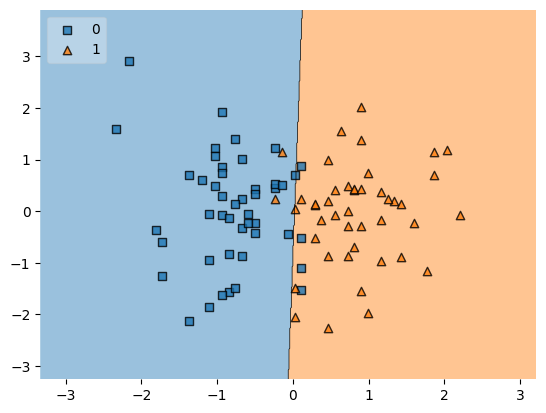

In [41]:
plot_decision_regions(X_train, y_train.values, clf=clf, legend=2)


In [47]:
import pickle

In [48]:
pickle.dump(clf,open('model.pkl','wb'))


In [49]:
import pickle

# Load the model from the file
model = pickle.load(open('model.pkl', 'rb'))

# Now you can use it like this:
# model.predict(...)


In [50]:
from google.colab import files
files.download('model.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>